# Gráficas, Dijkstra y Floyd

In [205]:
import networkx as nx
import random as rnd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [273]:
"""regresa una lista o diccionario con las distancias
   (suma de pesos sobre el camino) del nodo ini a todos
   los otros nodos"""
def dijkstra(g, ini):
    if(ini not in g): 
        print('nodo no encontrado en la grafica')
        return 0
    
    # crea una nueva grafica para guardar las distancias "pathG"
    pathG = nx.Graph(g);
    
    
    #agrega el atribto de distancia a todos los nodos
    #usa 0 para el nodo de inicio y -1 para infinito
    for n in pathG.nodes:
        if(n == ini): 
            pathG.nodes[n]['dis'] = 0
        else:
            pathG.nodes[n]['dis'] = -1       

    visited = []
    while(set(visited) != set(g.nodes)):
        nextNode = getNext(pathG, visited)
        
        visited.append(nextNode)
        
        updateDist(pathG, nextNode)
    return pathG

"""Metodo auxiliar para encontrar el siguiente nodo a analizar"""
def getNext(g, visited):    
    dists = {u:v['dis'] for u,v in g.nodes.data() if u not in visited and v['dis'] !=-1}
    return min(dists, key=dists.get)

"""Metodo auxiliar para cambiar los valores de las distancias sobre la grafica de distancias"""
def updateDist(g, node):
    distToNode = g.nodes[node]['dis']
    for nbr in g[node]:
        distFromNode = distToNode + g.edges[node, nbr]['weight']
        if(g.nodes[nbr]['dis'] == -1 or g.nodes[nbr]['dis'] > distFromNode):
            g.nodes[nbr]['dis'] = distFromNode      
            
def pintaGraficaDijkstra(g):
    dist = [v['dis'] for u,v in g.nodes.data() ]
    labs = {u:str(u) + ':' + str(v['dis']) for u,v in g.nodes.data() }
    
    #fija la posicion de los nodos
    ps = nx.spring_layout(g)
    #pinta los nodos con sus nombres
    nx.draw(g, pos=ps , node_color = dist, cmap = plt.cm.Blues, node_size = 1000)
    nx.draw_networkx_labels(g, pos = ps, labels=labs)
    
    #crea diccionario de edge:weight para poner el peso sobre las aristas
    ed_labels = { (u,v):w['weight'] for u, v, w in g.edges.data()}
    
    nx.draw_networkx_edge_labels(g, pos=ps, edge_labels=ed_labels)
    
    
def pintaGrafica(g, labs=None):
    #fija la posicion de los nodos
    ps = nx.spring_layout(g)
    #pinta los nodos con sus nombres
    nx.draw(g, pos=ps ,with_labels=True)
    
    #crea diccionario de edge:weight para poner en las aristas el peso
    ed_labels = { (u,v):w['weight'] for u, v, w in g.edges.data()}
    
    nx.draw_networkx_edge_labels(g, pos=ps, edge_labels=ed_labels)
    


In [274]:
def floyd(g):
    #se crea la matriz de adjacencia desde la libreria de grafica
    mat = np.array([[-1]*len(g.nodes)]*len(g.nodes))
    for i in range(len(g.nodes)):
        mat[i, i] = 0
    iss,js,ws = sp.sparse.find(nx.adjacency_matrix(g))
    for i,j,w in zip(iss,js,ws):
        mat[i,j] = w 
        
    #se corre floyd sobre la matriz
    for k in range(len(g.nodes)):
        for i in range(len(g.nodes)):
            for j in range(len(g.nodes)):
                if(mat[i][k] > 0 and mat[k][j] > 0):
                    if(mat[i, j] == -1):
                        mat[i, j] = mat[i][k] + mat[k][j]
                    else:
                        mat[i, j] = min(mat[i][j], mat[i][k] + mat[k][j])
    return mat


# Pruebas

In [275]:
g = nx.Graph()

In [276]:
g.add_nodes_from((i for i in range (10)))

In [277]:
list(g.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [278]:
lisEd = [(9,7),(7,8),(8,6),(6,0),(0,2),(0,1),(1,5),(5,3),(5,10),(3,10),(10,4),(7,0),(7,3)];

In [279]:
for edge in lisEd:
    g.add_edge(edge[0], edge[1], weight = rnd.randint(1,9))

In [280]:
for e in g.edges:
    print(str(e) + str(g[e[0]][e[1]]))

(0, 6){'weight': 5}
(0, 2){'weight': 2}
(0, 1){'weight': 2}
(0, 7){'weight': 8}
(1, 5){'weight': 8}
(3, 5){'weight': 8}
(3, 10){'weight': 1}
(3, 7){'weight': 6}
(4, 10){'weight': 6}
(5, 10){'weight': 9}
(6, 8){'weight': 3}
(7, 9){'weight': 7}
(7, 8){'weight': 3}


In [281]:
list(g.edges.data())
ed_labels = {(u,v):w['weight'] for u, v, w in g.edges.data()}
ed_labels

{(0, 6): 5,
 (0, 2): 2,
 (0, 1): 2,
 (0, 7): 8,
 (1, 5): 8,
 (3, 5): 8,
 (3, 10): 1,
 (3, 7): 6,
 (4, 10): 6,
 (5, 10): 9,
 (6, 8): 3,
 (7, 9): 7,
 (7, 8): 3}

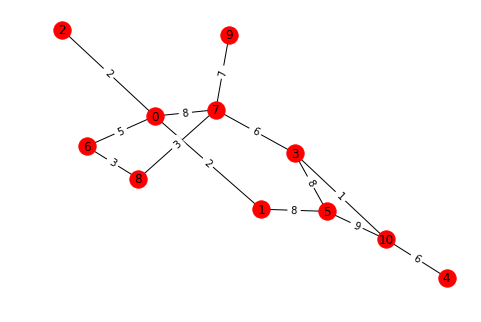

In [282]:
pintaGrafica(g)

In [283]:
pathD = dijkstra(g,0)
matFloyd = floyd(g)
matFloyd[0]

array([ 0,  2,  2, 14, 21, 10,  5,  8,  8, 15, 15])

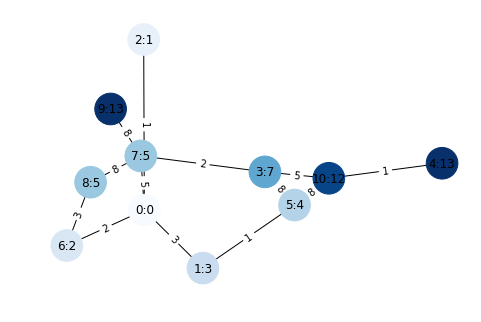

In [286]:
pintaGraficaDijkstra(path)

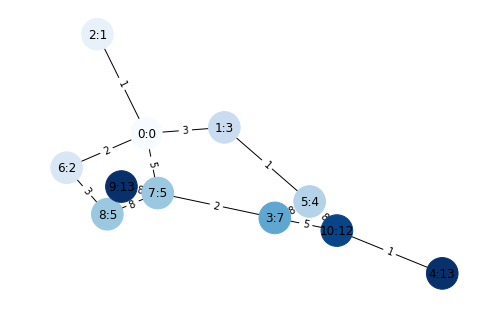

In [287]:
pintaGraficaDijkstra(path)

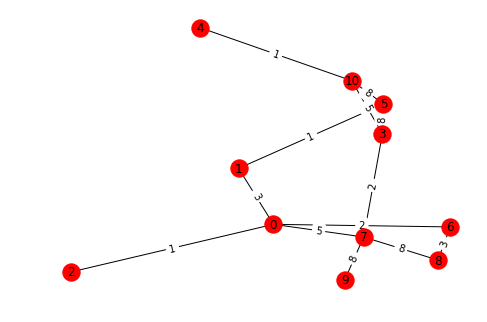

In [288]:
pintaGrafica(path)

In [201]:
fl = floyd(g)

In [202]:
fl

array([[ 0,  3,  1,  7, 13,  4,  2,  5,  5, 13, 12],
       [ 3,  0,  4,  9, 10,  1,  5,  8,  8, 16,  9],
       [ 1,  4,  0,  8, 14,  5,  3,  6,  6, 14, 13],
       [ 7,  9,  8,  0,  6,  8,  9,  2, 10, 10,  5],
       [13, 10, 14,  6,  0,  9, 15,  8, 16, 16,  1],
       [ 4,  1,  5,  8,  9,  0,  6,  9,  9, 17,  8],
       [ 2,  5,  3,  9, 15,  6,  0,  7,  3, 15, 14],
       [ 5,  8,  6,  2,  8,  9,  7,  0,  8,  8,  7],
       [ 5,  8,  6, 10, 16,  9,  3,  8,  0, 16, 15],
       [13, 16, 14, 10, 16, 17, 15,  8, 16,  0, 15],
       [12,  9, 13,  5,  1,  8, 14,  7, 15, 15,  0]])